In [37]:
import pandas as pd

# Load the datasets
accident_data = pd.read_csv('kaggle_data/accident_data.csv', encoding='latin1')
vehicle_data = pd.read_csv('kaggle_data/vehicle_data.csv', encoding='latin1')
# Merge the data on Accident_Index
merged_data = pd.merge(accident_data, vehicle_data, on='Accident_Index', how='inner')
accident_data_first_10000 = accident_data.head(10000)
vehicle_data_first_10000 = vehicle_data.head(10000)


In [38]:
# Convert the 'Date' column to datetime
merged_data['Date'] = pd.to_datetime(merged_data['Date'], errors='coerce')

# Extract the year from the 'Date' column
merged_data['Year'] = merged_data['Date'].dt.year

# Filter the data for the years 2006 to 2010
filtered_data = merged_data[merged_data['Year'].between(2006, 2010)]

In [39]:
# Extract relevant columns for analysis
analysis_data = filtered_data[['Accident_Severity', 'Engine_Capacity_.CC.', 'model', 'Age_of_Vehicle', 'Speed_limit']]

# Display basic stats
analysis_data.describe()

,Engine_Capacity_.CC.,Age_of_Vehicle,Speed_limit
count,166783.000000,158667.000000,182276.000000
mean,2135.746665,6.425564,39.187743
std,2125.690696,4.472870,14.214603
min,6.000000,1.000000,10.000000
25%,1323.000000,3.000000,30.000000
50%,1686.000000,6.000000,30.000000
75%,1998.000000,9.000000,50.000000
max,96000.000000,85.000000,70.000000


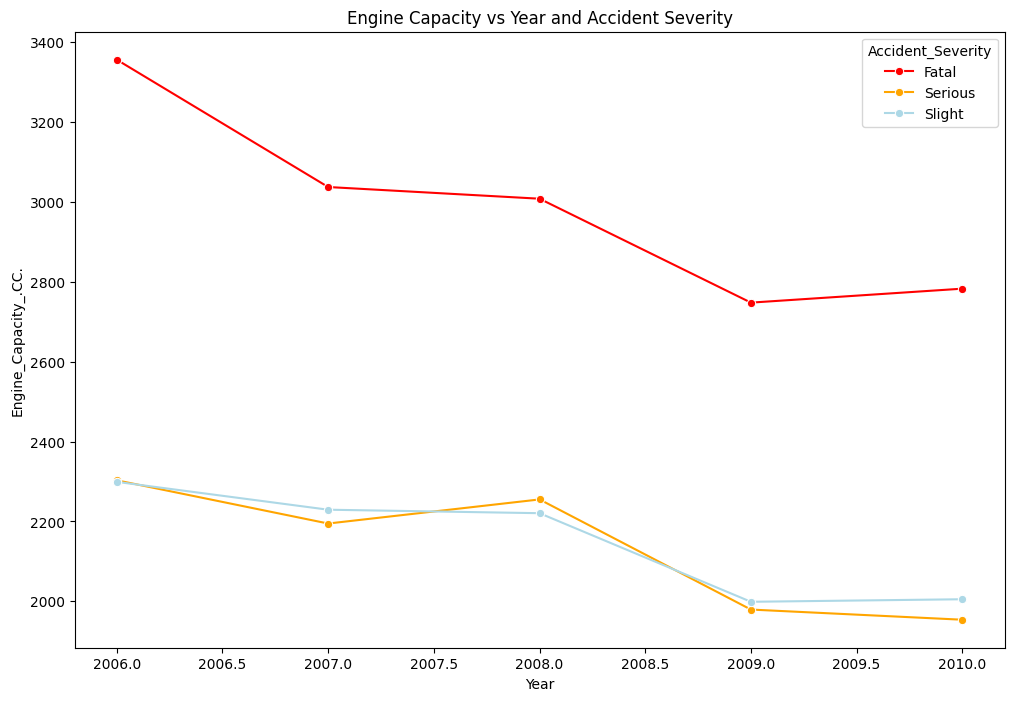

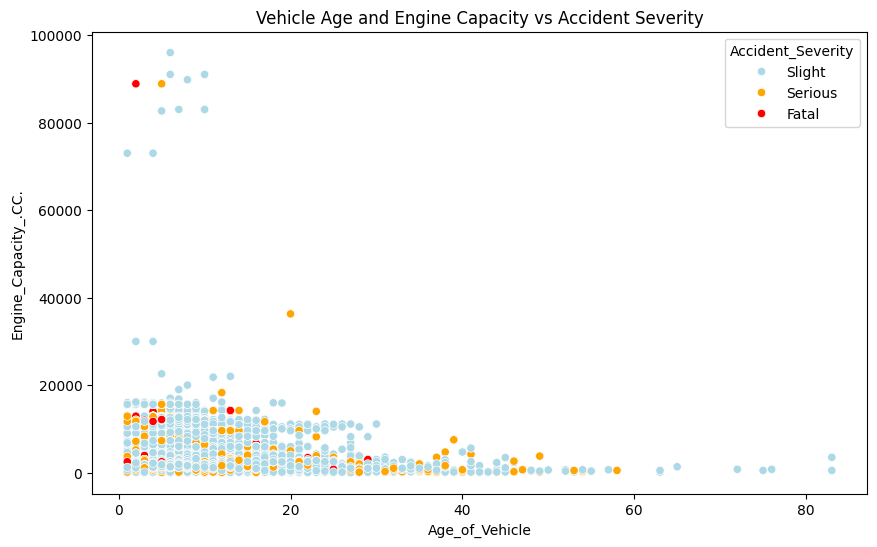

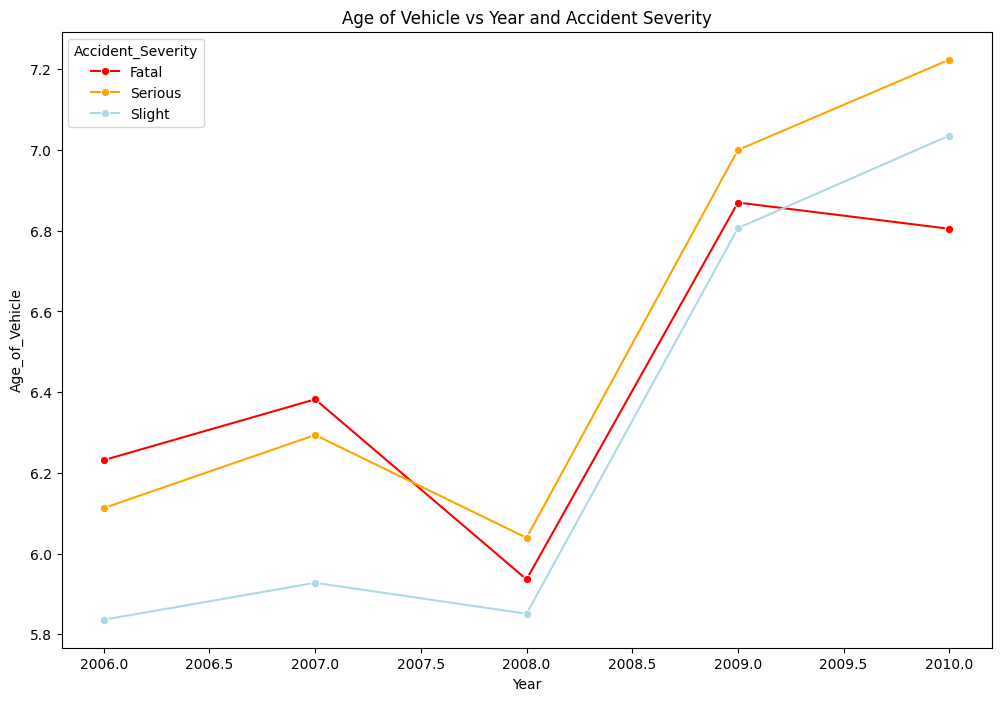

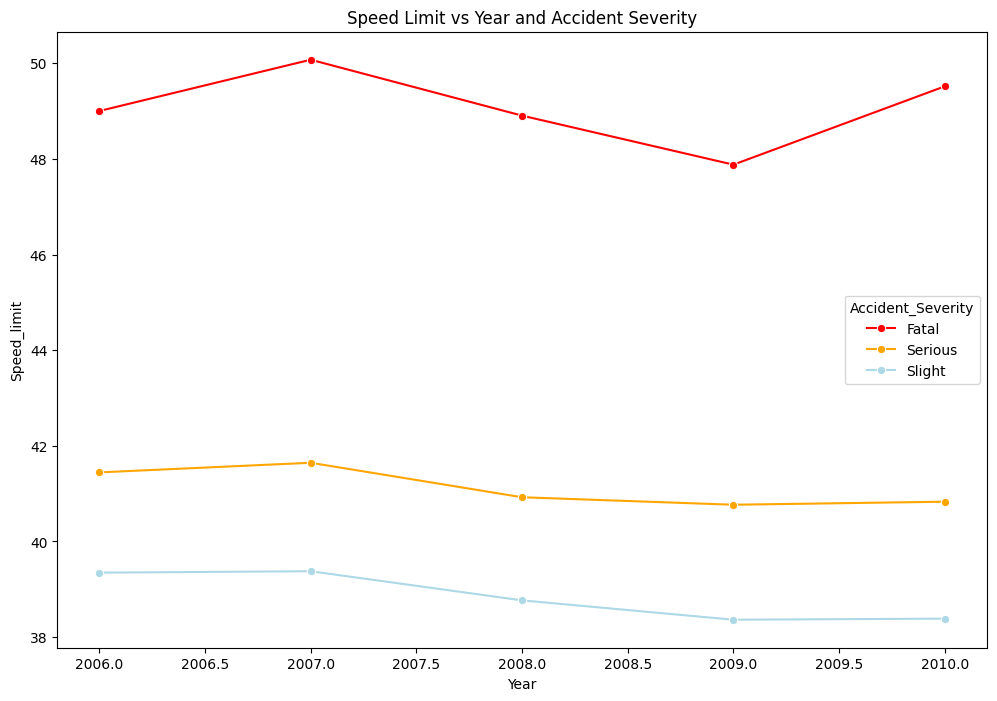

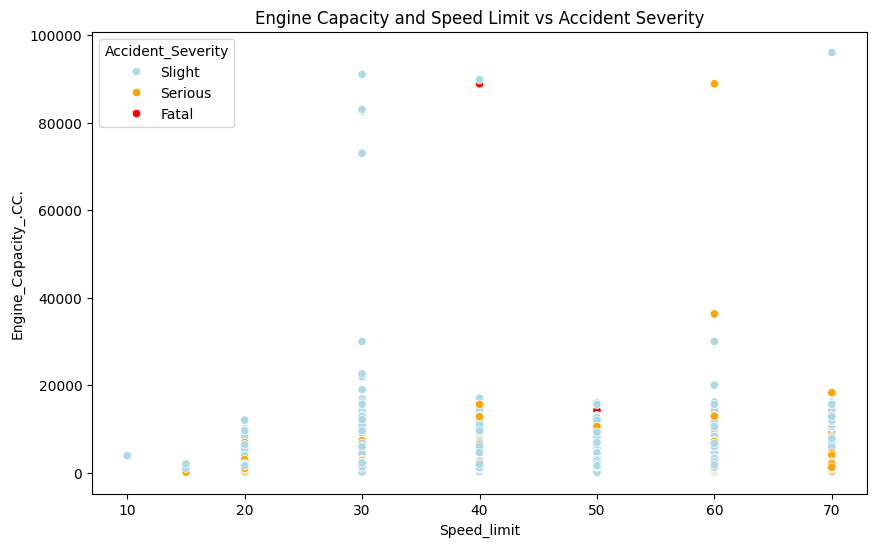

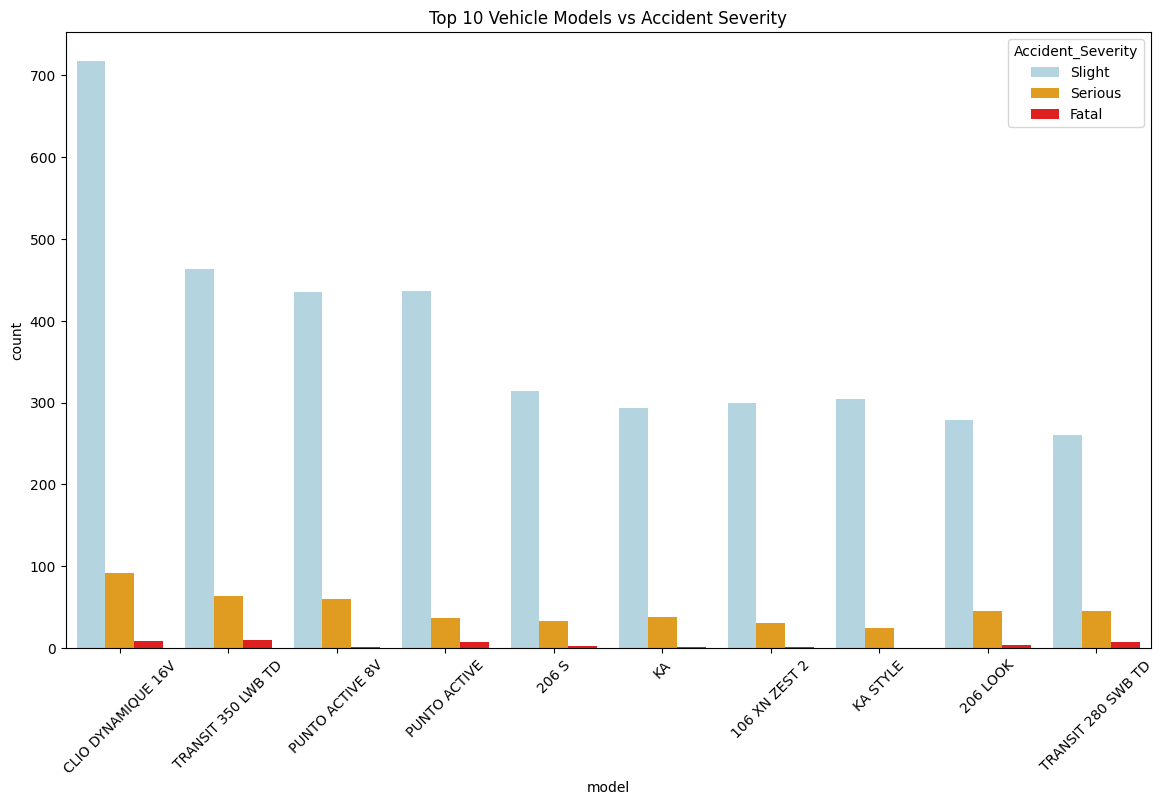

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_columns = ['Engine_Capacity_.CC.', 'Age_of_Vehicle', 'Speed_limit']
yearly_data = analysis_data.groupby(['Year', 'Accident_Severity'])[numeric_columns].mean().reset_index()
# Group by Year and Accident Severity, selecting only numeric columns
numeric_columns = ['Engine_Capacity_.CC.', 'Age_of_Vehicle', 'Speed_limit']
yearly_data = analysis_data.groupby(['Year', 'Accident_Severity'])[numeric_columns].mean().reset_index()

# Plot the trends for Engine Capacity vs Year and Accident Severity with custom colors
plt.figure(figsize=(12,8))
sns.lineplot(data=yearly_data, x='Year', y='Engine_Capacity_.CC.', hue='Accident_Severity', 
             marker='o', palette=severity_palette)
plt.title('Engine Capacity vs Year and Accident Severity')
plt.show()

# Scatter plot for age of vehicle vs engine capacity, colored by accident severity
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age_of_Vehicle', y='Engine_Capacity_.CC.', hue='Accident_Severity', 
                data=analysis_data, palette=severity_palette)
plt.title('Vehicle Age and Engine Capacity vs Accident Severity')
plt.show()

# Plot the trends for Age of Vehicle vs Year and Accident Severity with custom colors
plt.figure(figsize=(12,8))
sns.lineplot(data=yearly_data, x='Year', y='Age_of_Vehicle', hue='Accident_Severity', 
             marker='o', palette=severity_palette)
plt.title('Age of Vehicle vs Year and Accident Severity')
plt.show()

# Plot the trends for Speed Limit vs Year and Accident Severity
plt.figure(figsize=(12,8))
sns.lineplot(data=yearly_data, x='Year', y='Speed_limit', hue='Accident_Severity', 
             marker='o', palette=severity_palette)
plt.title('Speed Limit vs Year and Accident Severity')
plt.show()

# Scatter plot for Engine Capacity vs Speed Limit, colored by Accident Severity
plt.figure(figsize=(10,6))
sns.scatterplot(x='Speed_limit', y='Engine_Capacity_.CC.', hue='Accident_Severity', 
                data=analysis_data, palette=severity_palette)
plt.title('Engine Capacity and Speed Limit vs Accident Severity')
plt.show()

# Countplot for models, colored by Accident Severity
plt.figure(figsize=(14,8))
sns.countplot(data=filtered_data, x='model', hue='Accident_Severity', palette=severity_palette, 
              order=filtered_data['model'].value_counts().index[:10])  # Top 10 most common models
plt.xticks(rotation=45)
plt.title('Top 10 Vehicle Models vs Accident Severity')
plt.show()
